In [2]:
pip install tensorflow opencv-contrib-python matplotlib coslib simple_image_download 


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement coslib (from versions: none)
ERROR: No matching distribution found for coslib


Looking in indexes: https://artifactory.micron.com/artifactory/api/pypi/zextpythonorg-pypi-rel-remote/simple


In [2]:
import tensorflow as tf 
import os


In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt 

C:\Users\FHILMANBINHA\AppData\Local\Temp\ipykernel_21896\851803758.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
from skimage.io import imread
from skimage.transform import resize 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

c:\ProgramData\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
import numpy as np 


In [6]:
from tensorflow.keras import datasets,layers, models

In [41]:
data = tf.keras.utils.image_dataset_from_directory('data_2')




Found 1752 files belonging to 5 classes.


In [42]:
data_iterator = data.as_numpy_iterator()

In [43]:
batch = data_iterator.next()

In [44]:
batch[0].shape

(32, 256, 256, 3)

In [45]:
# Class 1 = Good
# Class 0 = Bad
batch[1]

array([0, 3, 1, 4, 0, 3, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 4, 0, 2, 1, 0, 2,
       4, 3, 0, 0, 4, 1, 2, 3, 1, 2])

In [46]:
classes = ["UBFL", "UBLD", "UBNF", "UCON", "Good" ]

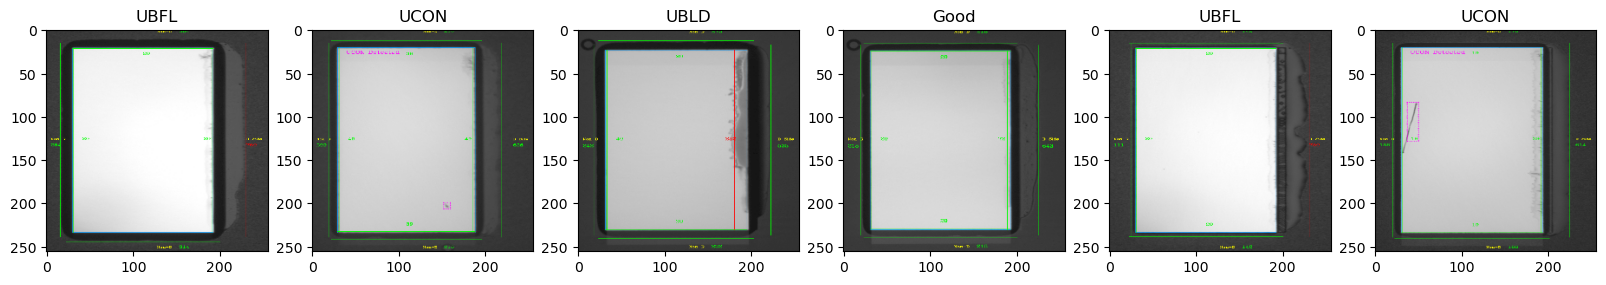

In [47]:
fig, ax = plt.subplots(ncols=6, figsize = (20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(classes[batch[1][idx]])

In [48]:

data = data.map(lambda x,y:(x/255, y ))


In [49]:
scaled_iterator = data.as_numpy_iterator()

In [50]:
scaled_iterator.next()

(array([[[[0.2573839 , 0.2573839 , 0.2573839 ],
          [0.25785846, 0.25785846, 0.25785846],
          [0.2566193 , 0.2566193 , 0.2566193 ],
          ...,
          [0.23137255, 0.23137255, 0.23137255],
          [0.23045442, 0.23045442, 0.23045442],
          [0.23318015, 0.23318015, 0.23318015]],
 
         [[0.25490198, 0.25490198, 0.25490198],
          [0.25456792, 0.25456792, 0.25456792],
          [0.25258884, 0.25258884, 0.25258884],
          ...,
          [0.22837554, 0.22837554, 0.22837554],
          [0.22681995, 0.22681995, 0.22681995],
          [0.23108248, 0.23108248, 0.23108248]],
 
         [[0.25255656, 0.25255656, 0.25255656],
          [0.25490198, 0.25490198, 0.25490198],
          [0.24953221, 0.24953221, 0.24953221],
          ...,
          [0.23137255, 0.23137255, 0.23137255],
          [0.2305656 , 0.2305656 , 0.2305656 ],
          [0.2356158 , 0.2356158 , 0.2356158 ]],
 
         ...,
 
         [[0.25056678, 0.25056678, 0.25056678],
          [0.25056

In [51]:
train_size = int(len(data)*.7)

In [52]:
val_size = int(len(data)*.2)

In [53]:
test_size = int(len(data)*.1)

In [54]:
train_data= data.take(train_size)

In [55]:
val_data = data.skip(train_size).take(val_size)


In [56]:
test_data = data.skip(train_size + val_size).take(test_size)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [61]:
model= Sequential()


In [62]:
model.add(Conv2D(32,(3,3),1,activation='relu',padding='same',name = 'block1_conv1',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),1,activation='relu',padding='same',name = 'block1_conv2'))
model.add(MaxPooling2D((2,2),strides=(2,2),name = 'block1_pool'))

model.add(Conv2D(128,(3,3),1,activation='relu',padding='same',name = 'block2_conv1'))
model.add(Conv2D(128,(3,3),1,activation='relu',padding='same',name = 'block2_conv2'))
model.add(MaxPooling2D((2,2),strides=(2,2),name = 'block2_pool'))

model.add(Conv2D(256,(3,3),1,activation='relu',padding='same',name = 'block3_conv1'))
model.add(Conv2D(256,(3,3),1,activation='relu',padding='same',name = 'block3_conv2'))
model.add(MaxPooling2D((2,2),strides=(2,2),name = 'block3_pool'))


model.add(Flatten(name = 'flatten'))
model.add(Dense(512,activation='relu',name= 'fc1'))
model.add(Dense(256,activation='relu',name= 'fc2'))

model.add(Dropout(0.5))


model.add(Dense(5,activation='softmax',name = 'predictions'))

In [63]:
model.compile('adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [64]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 512)            │   134,218,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,476,933 (516.80 MB)

 Trainable params: 135,476,933 (516.80 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [66]:
hist = model.fit(train_data, epochs = 5,validation_data= val_data, callbacks = [tensorboard_callback])


Epoch 1/5


38/38 ━━━━━━━━━━━━━━━━━━━━ 853s 22s/step - accuracy: 0.3508 - loss: 1.9670 - val_accuracy: 0.8920 - val_loss: 0.3371
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 726s 19s/step - accuracy: 0.8896 - loss: 0.4793 - val_accuracy: 0.9347 - val_loss: 0.3165
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 698s 18s/step - accuracy: 0.9491 - loss: 0.2585 - val_accuracy: 0.9716 - val_loss: 0.1738
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 759s 20s/step - accuracy: 0.9730 - loss: 0.1381 - val_accuracy: 0.9659 - val_loss: 0.2042
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 803s 21s/step - accuracy: 0.9684 - loss: 0.1311 - val_accuracy: 0.9801 - val_loss: 0.1514


In [67]:
model.save('my_modelV7.keras')

In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 512)            │   134,218,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,430,801 (1.51 GB)

 Trainable params: 135,476,933 (516.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 270,953,868 (1.01 GB)

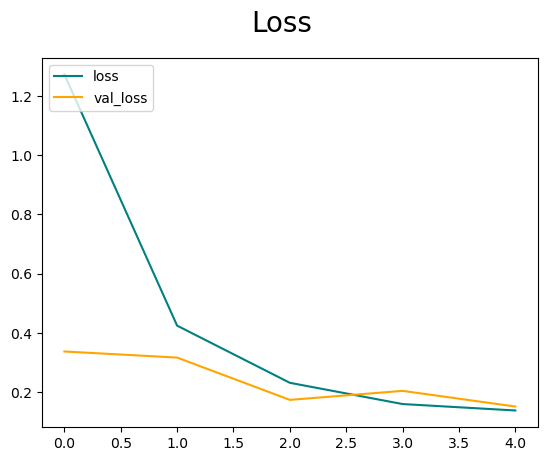

In [69]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color ='orange',label = 'val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc= "upper left")
plt.show()

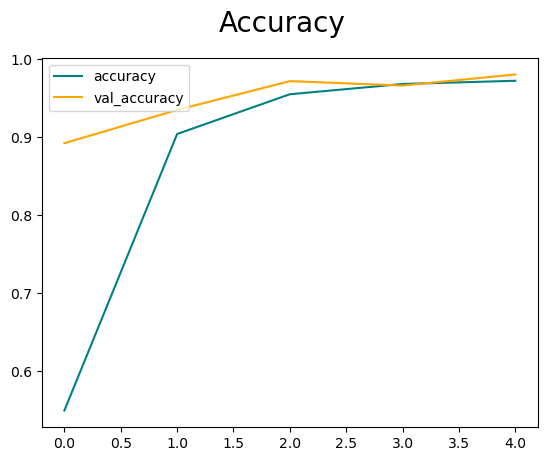

In [70]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color ='orange',label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize =20)
plt.legend(loc= "upper left")
plt.show()

In [72]:
model = tf.keras.models.load_model('my_modelV7.keras')

In [38]:
from tensorflow.keras.metrics import Precision, Recall,  SparseCategoricalAccuracy

In [73]:
pre = Precision()
re = Recall()
accuracy = SparseCategoricalAccuracy()

In [74]:


# Define the names of your classes
classes = ["UBFL", "UBLD", "UBNF", "UCON", "Good" ]

# Iterate over your test data
for batch in test_data:
    X, y = batch  # Unpack the batch into inputs and true labels
    yhat = model.predict(X)  # Make predictions on the inputs
    predicted_classes = np.argmax(yhat, axis=1)  # Find the classes with the highest predicted probabilities

    # Flatten y and predicted_classes
    y_flat = tf.reshape(y, [-1])
    predicted_classes_flat = tf.reshape(predicted_classes, [-1])

    # Update the state of the metrics
    pre.update_state(y_flat, predicted_classes_flat)
    re.update_state(y_flat, predicted_classes_flat)
    accuracy.update_state(y_flat, predicted_classes_flat)

# Get the current result of the metrics
precision_result = pre.result().numpy()
recall_result = re.result().numpy()
accuracy_result = accuracy.result().numpy()


print(f'Precision: {precision_result}, Recall: {recall_result}')
print(f'Accuracy: {accuracy_result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Precision: 1.0, Recall: 1.0
Accuracy: 0.15625


In [43]:
import cv2
from tensorflow.keras.preprocessing import image

In [52]:
image_path = r"C:\Users\FHILMANBINHA\Coding\AI Model\test data\Picture10.png"

In [53]:
img = image.load_img(image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]
class_names = ['Good','NoDie','UBFL','UBLD', 'UBNF','UCON']
print(f'Prediction is {class_names[predicted_class]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction is UBLD
